<a href="https://colab.research.google.com/github/Deepak141/Internship/blob/master/proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  os
import pandas as pd
import io
import tensorflow as tf
import gc
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import adam
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#!unzip -uq "/content/drive/My Drive/S.zip" -d "/content/drive/My Drive/Sd"

In [ ]:
print('Available data', os.listdir("drive/My Drive/Su/S"))

Available data ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'unknown']


In [ ]:
zero=[]
one=[]
two=[]
three=[]
four=[]
five=[]
l0=[]
l1=[]
l2=[]
l3=[]
l4=[]
l5=[]



In [ ]:
p0=os.path.join("drive/My Drive/Su/S","0")
p1=os.path.join("drive/My Drive/Su/S","1")
p2=os.path.join("drive/My Drive/Su/S","2")
p3=os.path.join("drive/My Drive/Su/S","3")
p4=os.path.join("drive/My Drive/Su/S","4")
p5=os.path.join("drive/My Drive/Su/S","5")

In [ ]:
print(p0)

drive/My Drive/Su/S/0


In [ ]:
for i in os.listdir(p0):
    im=cv2.imread(p0+"/"+i)
    imgr=cv2.resize(im,(50,50))
    imgr=cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
    zero.append(imgr)
    l0.append(0)

In [ ]:
for i in os.listdir(p1):
    im=cv2.imread(p1+"/"+i)
    imgr=cv2.resize(im,(50,50))
    imgr=cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
    one.append(imgr)
    l1.append(1)

In [ ]:
for i in os.listdir(p2):
    im=cv2.imread(p2+"/"+i)
    imgr=cv2.resize(im,(50,50))
    imgr=cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
    two.append(imgr)
    l2.append(2)

In [ ]:
for i in os.listdir(p3):
    im=cv2.imread(p3+"/"+i)
    imgr=cv2.resize(im,(50,50))
    imgr=cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
    three.append(imgr)
    l3.append(3)

In [ ]:
for i in os.listdir(p4):
    im=cv2.imread(p4+"/"+i)
    imgr=cv2.resize(im,(50,50))
    imgr=cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
    four.append(imgr)
    l4.append(4)

In [ ]:
for i in os.listdir(p5):
    im=cv2.imread(p5+"/"+i)
    imgr=cv2.resize(im,(50,50))
    imgr=cv2.cvtColor(imgr, cv2.COLOR_BGR2GRAY)
    five.append(imgr)
    l5.append(5)

In [ ]:
row=zip(zero,one,two,three,four,five)
df=pd.DataFrame(row)
df.to_csv('drive/My Drive/Su/a.csv',index=False)

In [ ]:
row=zip(l0,l1,l2,l3,l4,l5)
df=pd.DataFrame(row)
df.to_csv('drive/My Drive/Su/label.csv',index=False)

In [ ]:
data=pd.read_csv('~/eg/a.csv')
label=p

In [ ]:
x=[]
for i in zero:
  x.append(i)
for i in one:
  x.append(i)
for i in two:
  x.append(i)
for i in three:
  x.append(i)
for i in four:
  x.append(i)
for i in five:
  x.append(i)

In [ ]:
len(x)

9000

In [ ]:
y=[]
for i in l0:
  y.append(i)
for i in l1:
  y.append(i)
for i in l2:
  y.append(i)
for i in l3:
  y.append(i)
for i in l4:
  y.append(i)
for i in l5:
  y.append(i)

In [ ]:
labels = np.array(y)
Y = np_utils.to_categorical(labels, 6)

In [ ]:
img_data = np.array(x)
img_data = img_data.astype('float32')
img_data /= 255


print (img_data.shape)

(9000, 50, 50)


In [ ]:
x,y = shuffle(img_data,Y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
X_train = X_train.reshape(-1,50, 50, 1) 
X_test = X_test.reshape(-1,50, 50, 1)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(50,50,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(50))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train, y_train, batch_size=50,epochs=20, validation_split=0.2)

Train on 5760 samples, validate on 1440 samples
Epoch 1/20
5760/5760 [==============================] - 2s 314us/step - loss: 1.5644 - accuracy: 0.3545 - val_loss: 1.0013 - val_accuracy: 0.6715
Epoch 2/20
5760/5760 [==============================] - 1s 245us/step - loss: 0.8410 - accuracy: 0.7148 - val_loss: 0.5160 - val_accuracy: 0.8368
Epoch 3/20
5760/5760 [==============================] - 1s 239us/step - loss: 0.5084 - accuracy: 0.8302 - val_loss: 0.3498 - val_accuracy: 0.8819
Epoch 4/20
5760/5760 [==============================] - 1s 242us/step - loss: 0.3427 - accuracy: 0.8852 - val_loss: 0.2660 - val_accuracy: 0.9174
Epoch 5/20
5760/5760 [==============================] - 1s 238us/step - loss: 0.2503 - accuracy: 0.9172 - val_loss: 0.2105 - val_accuracy: 0.9347
Epoch 6/20
5760/5760 [==============================] - 1s 241us/step - loss: 0.1989 - accuracy: 0.9352 - val_loss: 0.1686 - val_accuracy: 0.9493
Epoch 7/20
5760/5760 [==============================] - 1s 243us/step - loss

<function matplotlib.pyplot.figure>

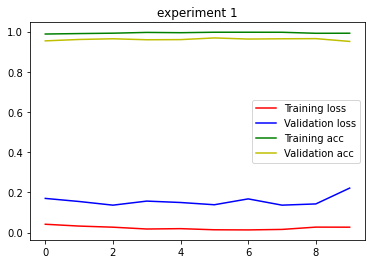

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("experiment 1")
plt.legend(loc=0)
plt.figure



<function matplotlib.pyplot.figure>

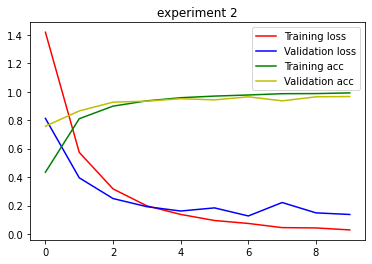

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("experiment 2")
plt.legend(loc=0)
plt.figure



<function matplotlib.pyplot.figure>

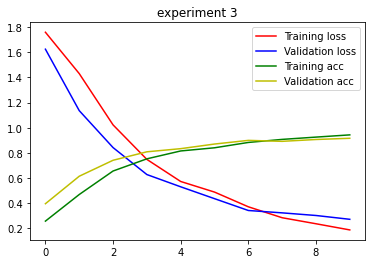

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("experiment 3")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

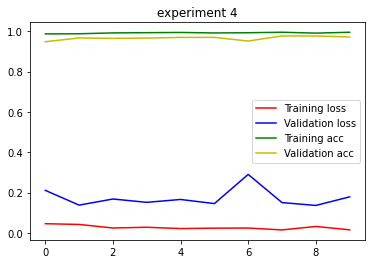

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("experiment 4")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

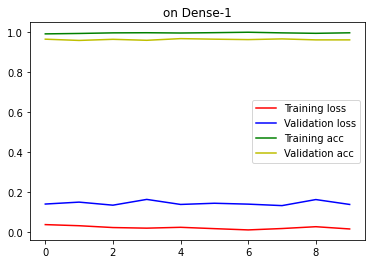

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-1")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

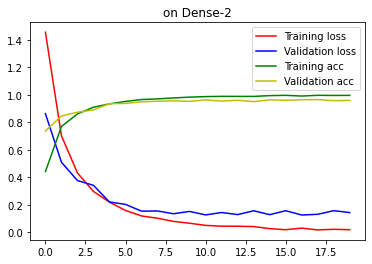

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-2")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

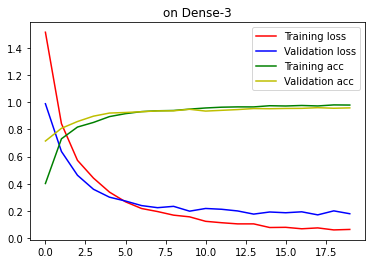

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-3")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

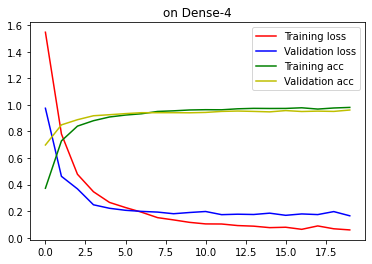

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-4")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

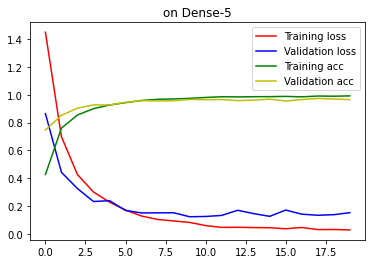

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-5")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

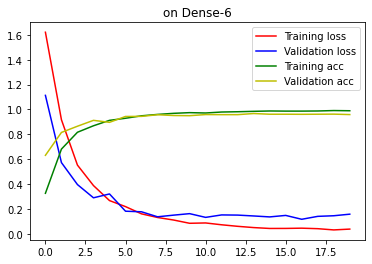

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-6")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

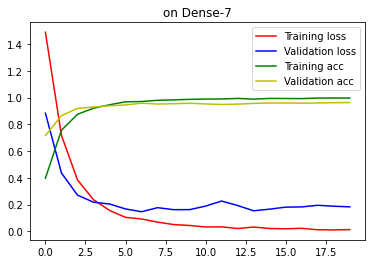

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-7")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

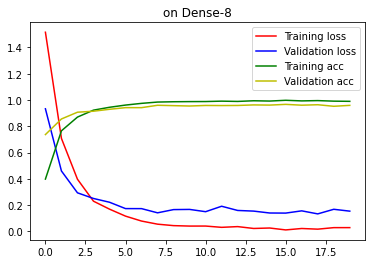

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-8")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

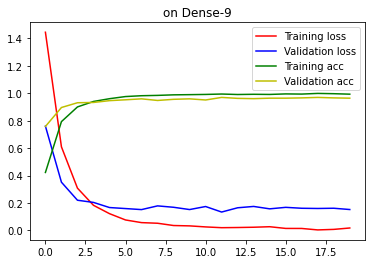

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-9")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

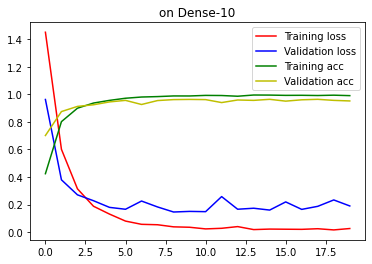

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("on Dense-10")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

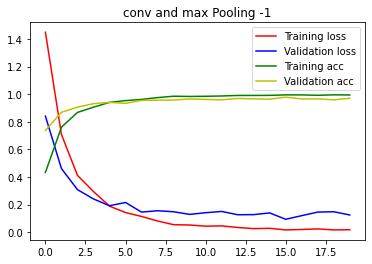

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("conv and max Pooling -1")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

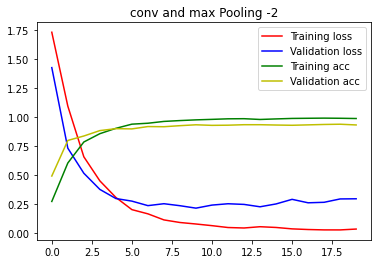

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("conv and max Pooling -2")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

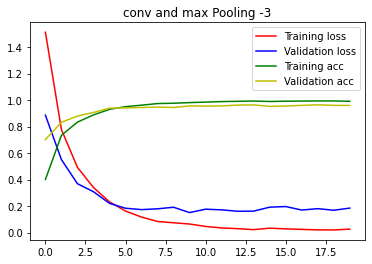

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("conv and max Pooling -3")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

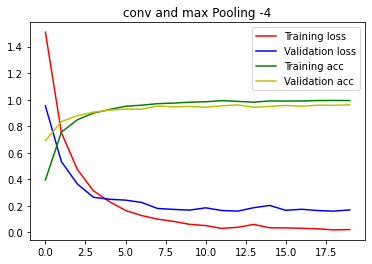

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("conv and max Pooling -4")
plt.legend(loc=0)
plt.figure

<function matplotlib.pyplot.figure>

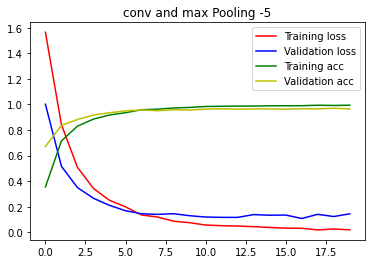

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = hist.history['accuracy']
val_accuracy=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.plot(epochs,accuracy,'g',label="Training acc")
plt.plot(epochs,val_accuracy,'y',label="Validation acc")
plt.title("conv and max Pooling -5")
plt.legend(loc=0)
plt.figure